# Data Cleaning

**Using the data we have accumulated, let us see how best we can allocate funds across states to fight against COVID-19.**

If there is a central fund for allocation to states, Centre will aim to allocate funds to states taking into consideration the gap in vulnerable population and available medical facilities

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('mode.chained_assignment', None)

In [2]:
from pathlib import Path
DATA = Path('data')

In [3]:
!ls {DATA/'nhrr'}

NHRR2019.pdf  NHRR2019.xlsx


### Reading from Excel file containing data in multiple tabs

In [4]:
xl_file = pd.ExcelFile(DATA/'nhrr'/'NHRR2019.xlsx')

dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

In [5]:
#Reading datasets from all tabs
dfs.keys()

dict_keys(['medicalcollege', 'doctor', 'governmentdoctor', 'staff', 'pneumonia', 'acuterespiratoryinfection', 'population', 'agegroup'])

**Poll 1 - Selecting data to identify vulnerable population**

### Finding states with maximum vulnerable population

In [6]:
df_population = dfs['population']
df_population.head()

,State/UT,2018-Persons,2018-Males,2018-Females,2019-Persons,2019-Males,2019-Females,2020-Persons,2020-Males,2020-Females
0,Andhra Pradesh,89691,44986,44705,90330,45293,45037,90949,45591,45359
1,Arunachal Pradesh,1341,705,636,1354,711,642,1367,718,649
2,Assam,33166,16978,16188,33516,17150,16366,33856,17317,16539
3,Bihar,106192,54784,51408,107293,55315,51978,108372,55833,52539
4,Chhattisgarh,26488,13294,13194,26782,13441,13341,27066,13584,13483


In [7]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State/UT      35 non-null     object
 1   2018-Persons  35 non-null     int64 
 2   2018-Males    35 non-null     int64 
 3   2018-Females  35 non-null     int64 
 4   2019-Persons  35 non-null     int64 
 5   2019-Males    35 non-null     int64 
 6   2019-Females  35 non-null     int64 
 7   2020-Persons  35 non-null     int64 
 8   2020-Males    35 non-null     int64 
 9   2020-Females  35 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 2.9+ KB


Now that we have population data, we know that the population above 65 (senior citizens) are most vulnerable to COVID infection. Let us see what this population size is. Since we do not have state-wise age group distribution, lets proceed with the country average.

In [8]:
df_age_group = dfs['agegroup']
df_age_group.head()

,Age Group,Total,Total-Males,Total-Females,Rural-Total,Rural-Males,Rural-Females,Urban-Total,Urban-Males,Urban-Females
0,0-4,8.3,8.5,8.1,8.9,9.1,8.7,7.0,7.2,6.8
1,2020-09-05 00:00:00,8.8,8.9,8.6,9.3,9.4,9.1,7.7,7.9,7.6
2,10-14,9.4,9.6,9.2,9.9,10.1,9.8,8.4,8.6,8.1
3,15-19,10.2,10.5,10.0,10.7,11.0,10.4,9.2,9.4,9.0
4,20-24,10.6,10.4,10.8,10.8,10.6,10.9,10.2,9.9,10.5


In [9]:
age_groups = set(df_age_group["Age Group"])
print(age_groups)

{'60-64', '25-29', '45-49', '70-74', '50-54', '35-39', '10-14', '20-24', '40-44', '30-34', '80-84', '15-19', '0-4', '75-79', datetime.datetime(2020, 9, 5, 0, 0), '55-59', '85+', '65-69'}


### Data Cleaning Issue 1 - One of the age group has been incorrectly read from excel- Need to fix

**Exercise 1: Can you find the easiest way to fix this issue?**

In [11]:
# YOUR CODE GOES HERE

In [13]:
age_group_risky = {'65-69','70-74','75-79','80-84','85+'}

In [14]:
risk_prop = df_age_group[df_age_group['Age Group'].isin(age_group_risky)]["Total"].sum()
risk_prop

5.2

In [15]:
df_population = df_population[['State/UT','2020-Persons']]
df_population['risky_pop'] = df_population["2020-Persons"] * (risk_prop / 100) * 1000
df_population.head()

,State/UT,2020-Persons,risky_pop
0,Andhra Pradesh,90949,4729348.0
1,Arunachal Pradesh,1367,71084.0
2,Assam,33856,1760512.0
3,Bihar,108372,5635344.0
4,Chhattisgarh,27066,1407432.0


In [16]:
df_comorbidity = dfs['acuterespiratoryinfection']
df_comorbidity.head()

,State/UT.,Male-Cases,Male-Deaths,Female-Cases,Female-Deaths,Total-Cases,Total-Deaths,Unnamed: 7
0,Andhra Pradesh,1577483,380,1572414,207,3149897,587,0.000186
1,Arunachal Pradesh,17723,0,15945,0,33668,0,0.000000
2,Assam,13634,182,10466,79,24100,261,0.010830
3,Bihar,479878,0,496303,2,976181,2,0.000002
4,Chhattisgarh,234641,12,224187,3,458828,15,0.000033


In [17]:
df_comorbidity = df_comorbidity[["State/UT.","Total-Cases"]]
df_comorbidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State/UT.    36 non-null     object
 1   Total-Cases  36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes


In [18]:
df_population = pd.merge(left=df_population, right=df_comorbidity, how='left', left_on='State/UT', right_on='State/UT.')

In [19]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State/UT      35 non-null     object 
 1   2020-Persons  35 non-null     int64  
 2   risky_pop     35 non-null     float64
 3   State/UT.     32 non-null     object 
 4   Total-Cases   32 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.6+ KB


In [20]:
df_population['risky_total'] = df_population['risky_pop'] + df_population['Total-Cases']
df_population.head()

,State/UT,2020-Persons,risky_pop,State/UT.,Total-Cases,risky_total
0,Andhra Pradesh,90949,4729348.0,Andhra Pradesh,3149897.0,7879245.0
1,Arunachal Pradesh,1367,71084.0,Arunachal Pradesh,33668.0,104752.0
2,Assam,33856,1760512.0,Assam,24100.0,1784612.0
3,Bihar,108372,5635344.0,Bihar,976181.0,6611525.0
4,Chhattisgarh,27066,1407432.0,Chhattisgarh,458828.0,1866260.0


**Poll 2 - Selecting data to identify medical infrastructure available**

We now have an idea of how many individuals are primarily at risk for COVID. On the other end, let us now see how the states are equipted with healthcare facilities to tackle the potential COVID situation. 

In [21]:
df_facility = dfs['medicalcollege']
df_facility.head()

,id,state,name,city,type,capacity,bed,point,address,lat,lng
0,0,Andaman & Nicobar Islands,Andaman & Nicobar Islands Insitute of Medical ...,Port Blair,Govt.,100.0,460,"(11.6729956, 92.7463269, 0.0)","Old Ayush Building, Near DHS Annexe Building, ...",11.672996,92.746327
1,1,Andhra Pradesh,ACSR Government Medical College Nellore,Nellore,Govt.,150.0,750,"(14.4278002, 79.9617576, 0.0)","1483, 25-2-1483, Podalakur Rd, Pragati Nagar, ...",14.427800,79.961758
2,2,Andhra Pradesh,"All India Institute of Medical Sciences, Manga...",Vijaywada,Govt.,50.0,0,"(16.444563, 80.58483249999999, 0.0)","Mangalagiri, Andhra Pradesh 522503, India",16.444563,80.584833
3,3,Andhra Pradesh,Alluri Sitaram Raju Academy of Medical Science...,Eluru,Trust,150.0,1070,"(16.7364625, 81.14365860000001, 0.0)","Malkapuram, West Godavari NH-5, Vijayawada, Vi...",16.736462,81.143659
4,4,Andhra Pradesh,"Andhra Medical College, Visakhapatnam",Visakhapatnam,Govt.,200.0,2017,"(17.7064928, 83.30486599999999, 0.0)",Medical College Road Opp Collector Office Maha...,17.706493,83.304866


### Data Cleaning Issue 2 - Some hospitals have zero beds!

In [22]:
df_facility = df_facility.groupby(['state'])["bed"].sum()
df_facility = df_facility.to_frame()
df_facility.head()

,bed
state,
Andaman & Nicobar Islands,460
Andhra Pradesh,20410
Arunachal Pradesh,0
Assam,5653
Bihar,7167


In [23]:
nonzero_mean = df_facility[ df_facility.bed != 0 ].mean()      #could have used median or zero
nonzero_mean

bed    11320.230769
dtype: float64


Impute - In case of missing values, we can simply replace missing values with zero, mean or median.

- Replace all with zero
```python
df_zero_imputed = df.fillna(0)
```

- Replace `na` with mean or median
```python
df_facility['bed'] = df_facility['bed'].fillna(df_facility['bed'].mean())
df_facility['bed'] = df_facility['bed'].fillna(df_facility['bed'].median())
```

- Replace missing categories
```python
df_replace_by_most_common_class = column.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_make_unknown_cat = column.fillna("Unknown")
```

In [24]:
df_facility.loc[ df_facility.bed == 0, "bed" ] = nonzero_mean.values[0]

In [25]:
df_facility

,bed
state,
Andaman & Nicobar Islands,460.000000
Andhra Pradesh,20410.000000
Arunachal Pradesh,11320.230769
Assam,5653.000000
Bihar,7167.000000
Chandigarh,11320.230769
Chhattisgarh,5139.000000
Dadra nad Nagar Haveli,11320.230769
Delhi,9471.000000


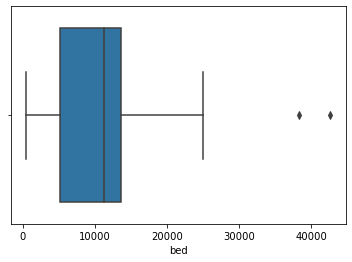

In [26]:
sns.boxplot(x=df_facility['bed'])

### Data Cleaning Issue 3 - Outliers

In [27]:
Q1 = df_facility['bed'].quantile(0.25)
Q3 = df_facility['bed'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_W = Q1 - (1.5 * IQR)
Upper_W = Q3 + (1.5 * IQR)
print(Lower_W, Upper_W)

5139.0
13693.0
8554.0
-7692.0 26524.0


In [28]:
df_max = df_facility[(df_facility['bed'] > Upper_W)]
df_max

,bed
state,
Karnataka,42656.0
Tamil Nadu,38326.0


In [29]:
#df_facility.loc[ df_facility.bed > Upper_W, "bed" ] = Upper_W

In [30]:
df_population = pd.merge(left=df_population, right=df_facility, how='left', left_on='State/UT', right_on='state')
df_population

,State/UT,2020-Persons,risky_pop,State/UT.,Total-Cases,risky_total,bed
0,Andhra Pradesh,90949,4729348.0,Andhra Pradesh,3149897.0,7879245.0,20410.000000
1,Arunachal Pradesh,1367,71084.0,Arunachal Pradesh,33668.0,104752.0,11320.230769
2,Assam,33856,1760512.0,Assam,24100.0,1784612.0,5653.000000
3,Bihar,108372,5635344.0,Bihar,976181.0,6611525.0,7167.000000
4,Chhattisgarh,27066,1407432.0,Chhattisgarh,458828.0,1866260.0,5139.000000
5,Goa,2170,112840.0,Goa,88564.0,201404.0,1160.000000
6,Gujarat,65532,3407664.0,Gujarat,2210656.0,5618320.0,19703.000000
7,Haryana,29002,1508104.0,Haryana,1059216.0,2567320.0,4223.000000
8,Himachal Pradesh,7311,380172.0,Himachal Pradesh,1594952.0,1975124.0,2028.000000
9,Jammu & Kashmir,12888,670176.0,NaN,NaN,NaN,5595.000000


### Data Cleaning Issue 4 - Inputations

**Exercise 2: Can you use any of the above inputation techniques to fix the issue and tell us the number of inputed beds for Nagaland? Can you think of a better logic to inpute missing beds?**

In [32]:
# YOUR CODE GOES HERE

In [33]:
df_population['risky_total'] = df_population['risky_total'].fillna(df_population['risky_total'].mean())

In [34]:
df_population

,State/UT,2020-Persons,risky_pop,State/UT.,Total-Cases,risky_total,bed
0,Andhra Pradesh,90949,4729348.0,Andhra Pradesh,3149897.0,7.879245e+06,20410.000000
1,Arunachal Pradesh,1367,71084.0,Arunachal Pradesh,33668.0,1.047520e+05,11320.230769
2,Assam,33856,1760512.0,Assam,24100.0,1.784612e+06,5653.000000
3,Bihar,108372,5635344.0,Bihar,976181.0,6.611525e+06,7167.000000
4,Chhattisgarh,27066,1407432.0,Chhattisgarh,458828.0,1.866260e+06,5139.000000
5,Goa,2170,112840.0,Goa,88564.0,2.014040e+05,1160.000000
6,Gujarat,65532,3407664.0,Gujarat,2210656.0,5.618320e+06,19703.000000
7,Haryana,29002,1508104.0,Haryana,1059216.0,2.567320e+06,4223.000000
8,Himachal Pradesh,7311,380172.0,Himachal Pradesh,1594952.0,1.975124e+06,2028.000000
9,Jammu & Kashmir,12888,670176.0,NaN,NaN,3.290783e+06,5595.000000


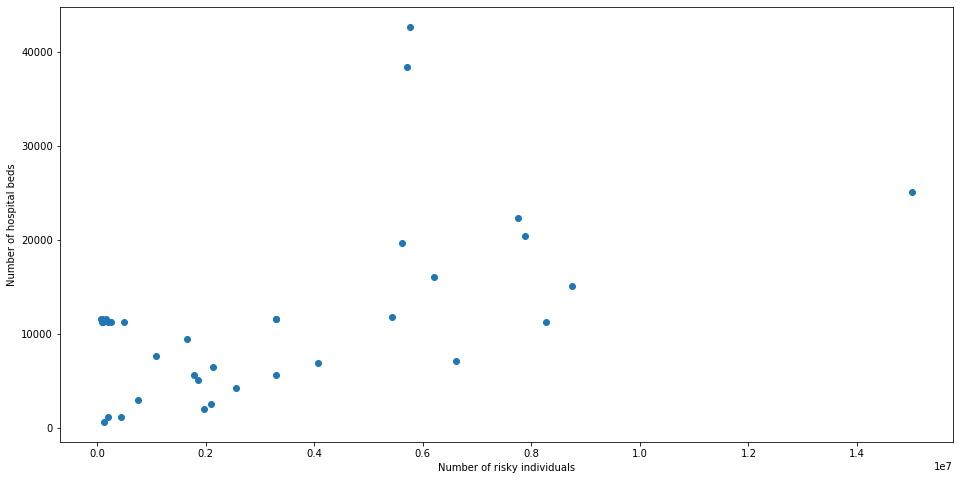

In [35]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_population['risky_total'], df_population['bed'])
ax.set_xlabel('Number of risky individuals')
ax.set_ylabel('Number of hospital beds')
plt.show()

In [36]:
df_population[df_population.risky_total == df_population.risky_total.max()]

,State/UT,2020-Persons,risky_pop,State/UT.,Total-Cases,risky_total,bed
26,Uttar Pradesh,231425,12034100.0,Uttar Pradesh,2984268.0,15018368.0,25065.0


Now we know about the hospital facilities available in different states. We also calculated the potential COVID vulnerable cases earlier. Let us combine them together to get an index to see which states need fund for better healthcare setup immediately.

In [37]:
df_population['priority'] =  df_population['risky_total']/df_population['bed']
df_population.head()

,State/UT,2020-Persons,risky_pop,State/UT.,Total-Cases,risky_total,bed,priority
0,Andhra Pradesh,90949,4729348.0,Andhra Pradesh,3149897.0,7879245.0,20410.000000,386.048261
1,Arunachal Pradesh,1367,71084.0,Arunachal Pradesh,33668.0,104752.0,11320.230769,9.253522
2,Assam,33856,1760512.0,Assam,24100.0,1784612.0,5653.000000,315.692906
3,Bihar,108372,5635344.0,Bihar,976181.0,6611525.0,7167.000000,922.495465
4,Chhattisgarh,27066,1407432.0,Chhattisgarh,458828.0,1866260.0,5139.000000,363.156256


In [38]:
df_population_result = df_population.sort_values(['priority'], ascending=[False])
df_population_result.head(10)

,State/UT,2020-Persons,risky_pop,State/UT.,Total-Cases,risky_total,bed,priority
8,Himachal Pradesh,7311,380172.0,Himachal Pradesh,1594952.0,1.975124e+06,2028.000000,973.927022
3,Bihar,108372,5635344.0,Bihar,976181.0,6.611525e+06,7167.000000,922.495465
10,Jharkhand,35278,1834456.0,Jharkhand,261427.0,2.095883e+06,2514.000000,833.684566
14,Maharashtra,125711,6536972.0,Maharashtra,1736580.0,8.273552e+06,11320.230769,730.864253
7,Haryana,29002,1508104.0,Haryana,1059216.0,2.567320e+06,4223.000000,607.937485
26,Uttar Pradesh,231425,12034100.0,Uttar Pradesh,2984268.0,1.501837e+07,25065.000000,599.176860
9,Jammu & Kashmir,12888,670176.0,NaN,NaN,3.290783e+06,5595.000000,588.165008
19,Odisha,43762,2275624.0,Odisha,1792816.0,4.068440e+06,6922.000000,587.754984
21,Rajasthan,76759,3991468.0,Rajasthan,4757749.0,8.749217e+06,15061.000000,580.918730
13,Madhya Pradesh,82134,4270968.0,Madhya Pradesh,1165501.0,5.436469e+06,11770.000000,461.892014


So above are the top 10 states in need to fund to scale up their health infrastructure. 

About the actual allocation of fund - 

https://economictimes.indiatimes.com/news/politics-and-nation/centre-releases-rs-17287-cr-to-states-to-fight-covid-19/articleshow/74973847.cms?from=mdr

